# Importing Libraries and the dataset

In [1148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1149]:
df = pd.read_csv("Churn_Modelling.csv")
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1736,1737,15663489,Onio,633,Germany,Female,29,0,138577.34,1,1,0,193362.99,0
3188,3189,15586757,Anenechukwu,801,France,Female,32,4,75170.54,1,1,1,37898.50,0
7606,7607,15571571,Ting,680,Germany,Female,31,3,127331.46,3,1,1,176433.60,0
7482,7483,15750104,Chan,718,Germany,Male,43,5,132615.73,2,1,0,32999.10,0
422,423,15674551,Fitch,535,Germany,Male,40,7,111756.50,1,1,0,8128.32,1


In [1150]:
df.drop(['RowNumber','CustomerId','Surname'],axis='columns',inplace=True)

In [1151]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9281,661,France,Female,31,3,133964.30,1,1,1,166187.10,0
6303,788,Germany,Female,49,4,137455.99,1,1,0,184178.29,1
5325,529,France,Female,43,0,123815.86,1,1,1,78463.99,1
931,564,Germany,Male,41,9,103522.75,2,1,1,34338.21,0
7049,602,France,Female,39,6,154121.32,2,1,0,176614.86,1


# Data exploration

In [1152]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [1153]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [1154]:
gender_distribution = df['Gender'].value_counts(normalize=True) * 100

print(gender_distribution)

Gender
Male      54.57
Female    45.43
Name: proportion, dtype: float64


In [1155]:
df['Geography'].value_counts(normalize=True) * 100

Geography
France     50.14
Germany    25.09
Spain      24.77
Name: proportion, dtype: float64

In [1156]:
df['Exited'].value_counts(normalize=True) * 100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

# Data Visualization

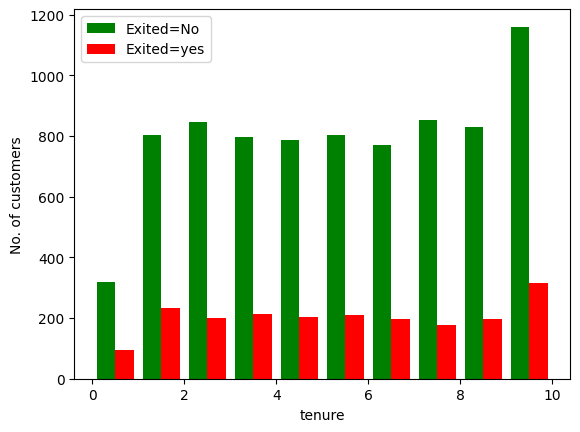

In [1157]:
tenure_exited_no = df[df.Exited== 0].Tenure
tenure_exited_yes = df[df.Exited== 1].Tenure
plt.xlabel("tenure")
plt.ylabel("No. of customers")
plt.hist([tenure_exited_no,tenure_exited_yes],color=['green','red'],label=['Exited=No','Exited=yes'])
plt.legend()

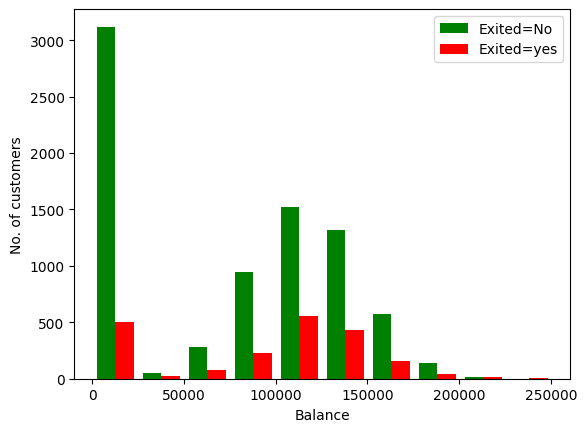

In [1158]:
balance_exited_no = df[df.Exited== 0].Balance
balance_exited_yes = df[df.Exited== 1].Balance
plt.xlabel("Balance")
plt.ylabel("No. of customers")
plt.hist([balance_exited_no,balance_exited_yes],color=['green','red'],label=['Exited=No','Exited=yes'])
plt.legend()

[]

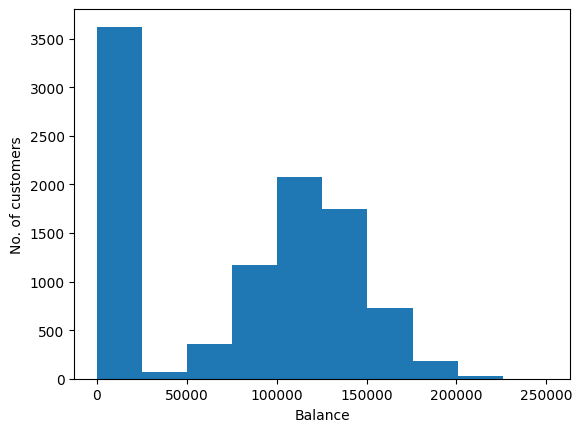

In [1159]:
plt.xlabel("Balance")
plt.ylabel("No. of customers")
plt.hist(df['Balance'])
plt.plot()

[]

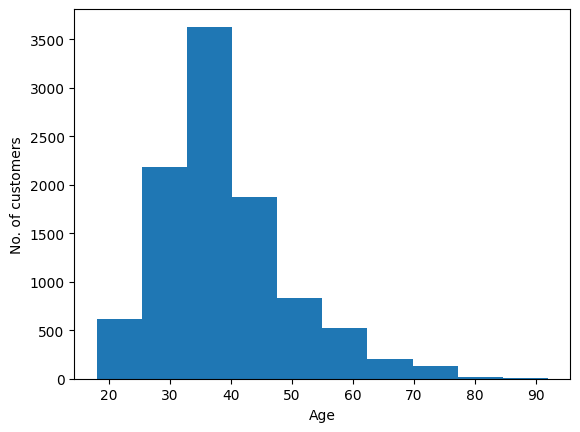

In [1160]:
plt.xlabel("Age")
plt.ylabel("No. of customers")
plt.hist(df['Age'])
plt.plot()

[]

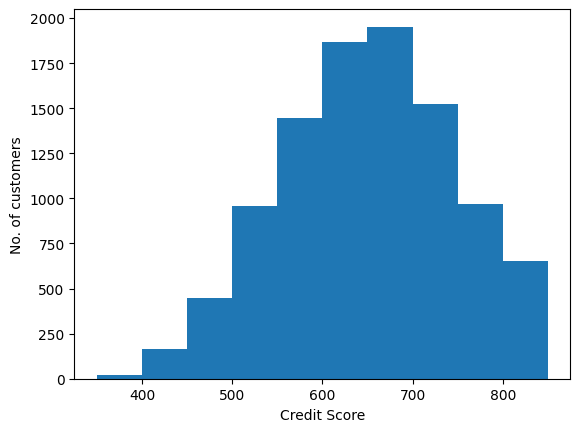

In [1161]:
plt.xlabel("Credit Score")
plt.ylabel("No. of customers")
plt.hist(df['CreditScore'])
plt.plot()

[]

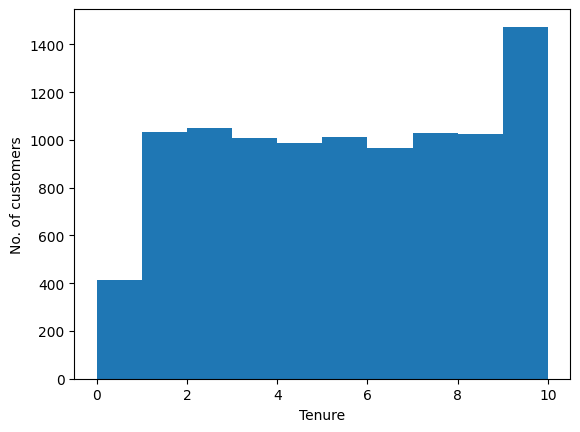

In [1162]:
plt.xlabel("Tenure")
plt.ylabel("No. of customers")
plt.hist(df['Tenure'])
plt.plot()

# Encoding and scaling the data

In [1163]:
for col in df:
    print(f'{col} : {df[col].unique()}')

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [1164]:
df.replace({'Female': 0,'Male':1},inplace= True)
df.replace({'France': 0,'Spain':1,'Germany':3},inplace= True)

In [1165]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1166]:
df['Tenure'] = scaler.fit_transform(df[["Tenure"]])

Use Robust scaler to avoid the outliers in the data

In [1167]:
from sklearn.preprocessing import RobustScaler
scaler2 = RobustScaler()

In [1168]:
cols_to_scale = ["CreditScore","Age","Balance","EstimatedSalary"]

In [1169]:
df[cols_to_scale] = scaler2.fit_transform(df[cols_to_scale])

In [1182]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4661,0.955224,0,0,0.500000,0.0,-0.761480,1,0,1,-0.858745,0
6835,1.179104,0,1,-0.333333,0.6,-0.761480,2,1,1,-0.225929,0
9923,0.544776,0,0,-0.666667,0.6,-0.761480,2,1,1,0.920688,0
2091,0.067164,0,0,0.000000,0.5,0.307312,1,1,0,-0.194043,0
6118,-0.149254,0,0,1.000000,0.5,0.554386,1,0,0,0.406635,0


In [1172]:
df.shape

(10000, 11)

# Spliting the data and Using SMOTE to solve the imbalance problem in the data (Exit values are 80 to 20)

In [1173]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split

In [1174]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

y_sm.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

In [1175]:
y_sm.shape

(15926,)

In [1176]:

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,random_state=42,stratify=y_sm)

# Model building and Evaluating it's accuracy,classification report on the test data 

In [1183]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(16,input_shape=(10,), activation='gelu'),
    keras.layers.Dense(32,activation='gelu'),
    keras.layers.Dense(1, activation='sigmoid')
])

opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=80)

Epoch 1/80
399/399 [==============================] - 2s 2ms/step - loss: 0.5007 - accuracy: 0.7520
Epoch 2/80
399/399 [==============================] - 1s 2ms/step - loss: 0.4525 - accuracy: 0.7889
Epoch 3/80
399/399 [==============================] - 1s 2ms/step - loss: 0.4445 - accuracy: 0.7914
Epoch 4/80
399/399 [==============================] - 1s 2ms/step - loss: 0.4378 - accuracy: 0.7943
Epoch 5/80
399/399 [==============================] - 1s 2ms/step - loss: 0.4335 - accuracy: 0.7961
Epoch 6/80
399/399 [==============================] - 1s 2ms/step - loss: 0.4272 - accuracy: 0.8020
Epoch 7/80
399/399 [==============================] - 1s 2ms/step - loss: 0.4218 - accuracy: 0.8060
Epoch 8/80
399/399 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.8075
Epoch 9/80
399/399 [==============================] - 1s 2ms/step - loss: 0.4161 - accuracy: 0.8053
Epoch 10/80
399/399 [==============================] - 1s 2ms/step - loss: 0.4130 - accuracy: 0.8108

In [1184]:
model.evaluate(X_test, y_test)

100/100 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8198


[0.4038485586643219, 0.8198367953300476]

In [1185]:
yp = model.predict(X_test)

100/100 [==============================] - 0s 1ms/step


In [1186]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [1187]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1593
           1       0.82      0.81      0.82      1593

    accuracy                           0.82      3186
   macro avg       0.82      0.82      0.82      3186
weighted avg       0.82      0.82      0.82      3186

